<a href="https://colab.research.google.com/github/gomesluiz/commonlit-readability-predicting/blob/main/make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição da legibilidade de um texto

O objetivo deste projeto é um modelo de predição de legibilidade de um texto baseado em técnicas de Aprendizado de Máquina (AM) e de Processamento de Linguagem Natural (PLN). Tal modelo poderá ser utilizado para indicar o texto mais apropriado de acordo com o perfil do leitor e, assim, ajudar a motivar o hábito de leitura. A leitura é uma habilidade essencial para o sucesso acadêmico. Quando os alunos têm acesso a passagens envolventes que oferecem o nível certo de desafio, eles naturalmente desenvolvem habilidades de leitura.
<br/><br/>
Nesse notebook, um modelo supervisionado de regressão será desenvolvido utilizando a processo CRISP-DM, a partir de uma base de dados utilizada na competição promovida, pela Kaggle [CommonLit Readability Prize](https://www.kaggle.com/competitions/commonlitreadabilityprize) e patrocinada pela [CommonLit, Inc.](https://www.commonlit.org/en); e pelo [Departamento de Linguística da Georgia State University](https://alsl.gsu.edu/), para exatamente tentar responder a essa questão.

## Pacotes Python
Os seguintes pacotes são necessários para a execução com sucesso desse notebook:
* [NLTK](https://www.nltk.org/): biblioteca de código aberto em Python que fornece pacotes para processamento de textos.
* [Pandas](https://pandas.pydata.org/): biblioteca de código aberto para análise de dados em Python que fornece estruturas de dados flexíveis e eficientes para trabalhar com dados estruturados e tabelas numéricas. 
* [String](https://docs.python.org/pt-br/3/library/string.html): biblioteca padrão Python para tratamento de strings.
* [Sklearn](https://scikit-learn.org/stable/index.html): é uma biblioteca de código aberto em Python para aprendizado de máquina. Ele fornece uma ampla variedade de algoritmos de aprendizado de máquina supervisionados e não supervisionados.


Na linha de comando do Linux ou do Windows, execute o comando
```
pip install nltk pandas string sklearn
```

e em uma célula do [Jupypter Notebook](https://jupyter.org/), execute o comando
```
!pip install nltk pandas string sklearn
```
Caso esses pacotes, ainda não estejam instalados. 

No [Google Colab](https://colab.research.google.com/), todos eles já estão disponíveis.

In [ ]:
# Pacotes necessários
import string

import nltk
import numpy as np

import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Metodologia
As etapas da metodologia deste projeto seguem o processo (Cross Industry Process for Data Mining CRISP-DM. CRISP-DM é um modelo de processo padrão para mineração de dados que descreve as etapas comuns, tarefas e entregáveis que são necessários para um projeto de mineração de dados bem-sucedido.

O CRISP-DM divide o processo de mineração de dados em seis etapas principais:

1. Entendimento do negócio: nesta fase, o objetivo é entender o problema de negócio que a mineração de dados irá resolver.

2. Entendimento dos dados: nesta fase, o objetivo é coletar, preparar e explorar os dados que serão utilizados na mineração.

3. Preparação dos dados: nesta fase, o objetivo é limpar e transformar os dados em um formato adequado para a análise.

4. Modelagem: nesta fase, o objetivo é construir e avaliar modelos de mineração de dados que possam ser usados para resolver o problema de negócio.

5. Avaliação: nesta fase, o objetivo é avaliar o desempenho dos modelos de mineração de dados e determinar se eles são adequados para resolver o problema de negócio.

6. Implantação: nesta fase, o objetivo é implementar os modelos de mineração de dados escolhidos na fase anterior e integrá-los ao processo de negócio.

O CRISP-DM é um processo iterativo e cada etapa pode envolver várias iterações até que o objetivo seja alcançado. 

## 1. Entendimento do negócio
Nessa etapa, é necessário entender o problema abordado, bem como as questões relacionadas ele. No contexto deste projeto, a questão primária a ser respondida é

> As técnicas de Aprendizado de Máquina (AM) e de Processamento de Linguagem Natural (PLN) podem predizer, com base em um texto, o nível de leitura, no qual uma pessoa se encontra, mais apropriado para lê-lo e, assim, ajudar a inspirar o aprendizado?


## 2. Entendimento dos dados

Nesta etapa, é necessário avaliar os dados estão disponíveis ou se é necessário coletar dados para responder às perguntas levantadas na etapa de **entendimento do negócio**.
<br/><br/>
Nesse notebook, vamos desenvolver, um modelo supervisionado de regressão, a partir de uma base de dados utilizada na competição promovida, pela Kaggle [CommonLit Readability Prize](https://www.kaggle.com/competitions/commonlitreadabilityprize) e patrocinada pela [CommonLit, Inc.](https://www.commonlit.org/en); e pelo [Departamento de Linguística da Georgia State University](https://alsl.gsu.edu/), para exatamente tentar responder a essa questão.
<br/><br/>
**Descrição da base de dados**

* **id** - Identificador para trecho do texto.
* **url_legal** - URL da fonte do trecho do texto.
* **license** - Licença de uso do trecho do texto.
* **excerpt** - Trecho do texto avaliado.
* **target** - Índice de facilidade de leitura do trecho do texto.
* **standard_error** - medida de distribuição de pontuações entre vários avaliadores para cada trecho. 


### 2.1 Coleta de dados




In [1]:
import pandas as pd
trechos = pd.read_csv("https://raw.githubusercontent.com/gomesluiz/commonlit-readability-predicting/main/datasets/train.csv", usecols=["excerpt", "target"])
trechos.columns = ["trecho", "legibilidade"]
trechos.head()

,trecho,legibilidade
0,When the young people returned to the ballroom...,-0.340259
1,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,"As Roger had predicted, the snow departed as q...",-0.580118
3,And outside before the palace a great garden w...,-1.054013
4,Once upon a time there were Three Bears who li...,0.247197


## 2.2 Análise exploratória de dados

In [6]:
def conta_palavra(texto):
  """Conta palavras no texto."""
  return len(texto.split())

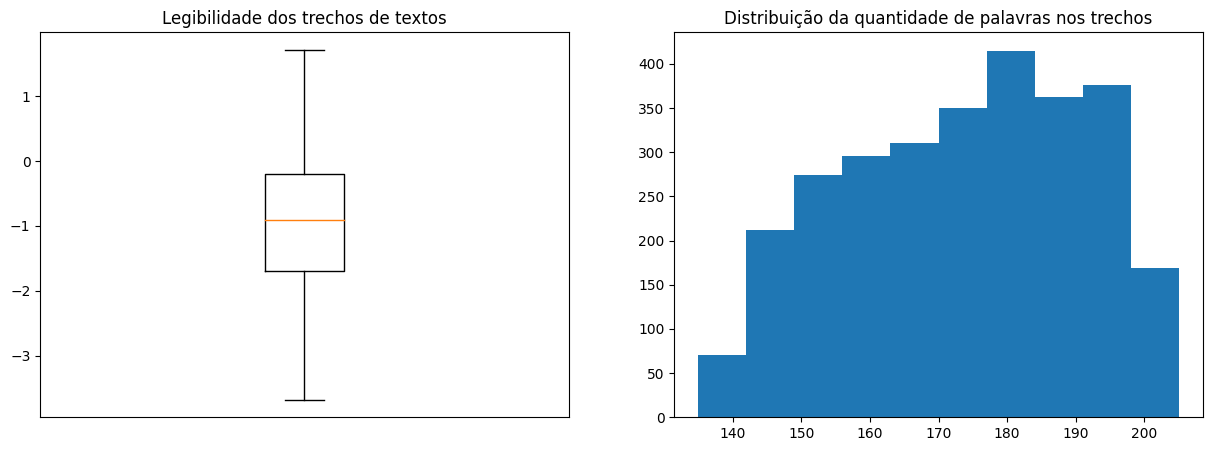

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(15, 5))
plt.subplot(1, 2, 1)
_ = plt.boxplot(trechos["legibilidade"])
_ = plt.title("Legibilidade dos trechos de textos")
_ = plt.xticks([], [])

plt.subplot(1, 2, 2)
_ = plt.hist(trechos["trecho"].apply(conta_palavra))
_ = plt.title("Distribuição da quantidade de palavras nos trechos")

plt.show()

## 3. Preparação de dados

### 3.1. Limpeza de dados

### 3.2. Normalização de dados

### 3.3. Tokenização

### 3.4. Remoção de palavras irrelevantes



In [19]:
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def preprocessa_texto(texto):
  # remove pontuação do texto.
  # normaliza o texto para minúsculo.
  texto_normalizado = "".join([palavra.lower() for palavra in texto if palavra not in string.punctuation])
  
  # tokeniza o texto
  texto_tokenizado = nltk.tokenize.word_tokenize(texto_normalizado)

  # remove palavras irrelevantes (stop words)
  texto_sem_stopwords = " ".join([palavra for palavra in texto_tokenizado if palavra not in stopwords])
 
  return texto_sem_stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# Teste da função preprocessa_texto.
print(f"Texto original:\n{trechos.iloc[0]['trecho']}")
print(f"Texto pré-processado:\n{preprocessa_texto(trechos.iloc[0]['trecho'])}")

Texto original:
When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear sn

In [25]:
# Pré-processa os trechos de textos.
trechos["trecho_processado"] = trechos["trecho"].apply(preprocessa_texto)
trechos.head()

,trecho,legibilidade,trecho_processado
0,When the young people returned to the ballroom...,-0.340259,young people returned ballroom presented decid...
1,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,dinner time mrs fayre somewhat silent eyes res...
2,"As Roger had predicted, the snow departed as q...",-0.580118,roger predicted snow departed quickly came two...
3,And outside before the palace a great garden w...,-1.054013,outside palace great garden walled round fille...
4,Once upon a time there were Three Bears who li...,0.247197,upon time three bears lived together house woo...


### 3.5 Vetorização

In [30]:
# Divide o dataset de trechos de textos em treinamento e teste.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trechos["trecho_processado"], trechos["legibilidade"], test_size=.25, random_state=32)

In [31]:
# Vetoriza os conjuntos de treinamento.
from sklearn.feature_extraction.text import CountVectorizer
vetorizador = CountVectorizer(max_features=1000)
X_train_vetorizado = vetorizador.fit_transform(X_train)
X_train_vetorizado = pd.DataFrame(X_train_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_train_vetorizado.index = X_train_vetorizado.index
X_train_vetorizado.head()

,10,ability,able,according,account,acid,across,act,action,active,...,writing,written,wrong,year,years,yellow,yes,yet,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Vetoriza os conjuntos de testes.
X_test_vetorizado = vetorizador.transform(X_test)
X_test_vetorizado = pd.DataFrame(X_test_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_test_vetorizado.index = X_test_vetorizado.index
X_test_vetorizado.head()

,10,ability,able,according,account,acid,across,act,action,active,...,writing,written,wrong,year,years,yellow,yes,yet,york,young
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Modelagem de aprendizado

### 4.1. Treinamento do Modelo

In [34]:
# Treina o modelo com o regressor linear simples para estabelecimento
# de um baseline.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
_= reg.fit(X_train_vetorizado, y_train)
print("Modelo baseline treinado.")

Modelo baseline treinado.


## 5. Avaliação do modelo

### 5.1 Teste do modelo

In [36]:
y_pred = reg.predict(X_test_vetorizado)

### 5.2 Avaliação dos resultados

In [37]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Coeficiente de determinação: 1 significa uma predição perfeita.
print("Coeficiente de determinação: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 1.00
Coeficiente de determinação: 0.02


## 6. Implantação do modelo

In [49]:
import pickle
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
arquivo = f"{timestamp}-model_predicao_legibilidade.sav"
pickle.dump(reg, open(arquivo, 'wb'))